In [1]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 448s 1us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1080, 1920, 3)


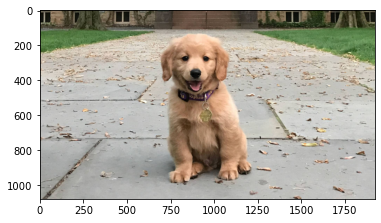

In [4]:
show_image("C:\\Users\\dassa\\Desktop\\doggy door dataset\\KOA_Nassau_2697x1517.jpg")

In [5]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [6]:
processed_image = load_and_process_image("C:\\Users\\dassa\\Desktop\\doggy door dataset\\brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1080, 1920, 3)
Original image shape:  (1080, 1920, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 4us/step
Predicted: [[('n02099601', 'golden_retriever', 0.8919492), ('n02088094', 'Afghan_hound', 0.04829881), ('n02091831', 'Saluki', 0.019097112)]]


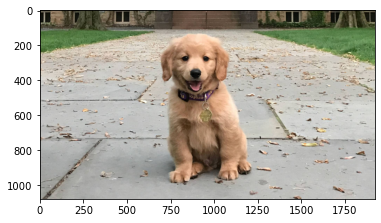

In [9]:
readable_prediction("C:\\Users\\dassa\\Desktop\\doggy door dataset\\KOA_Nassau_2697x1517.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 162ms/step
Predicted: [[('n02132136', 'brown_bear', 0.98538613), ('n02133161', 'American_black_bear', 0.013876267), ('n02410509', 'bison', 0.00026603724)]]


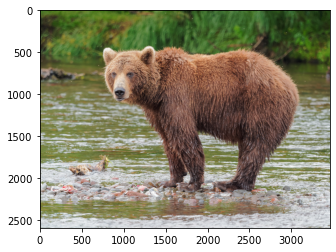

In [10]:
readable_prediction("C:\\Users\\dassa\\Desktop\\doggy door dataset\\brown_bear.jpg")

(485, 728, 3)
Original image shape:  (485, 728, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 168ms/step
Predicted: [[('n02124075', 'Egyptian_cat', 0.3234856), ('n02123159', 'tiger_cat', 0.28158277), ('n02123045', 'tabby', 0.1562509)]]


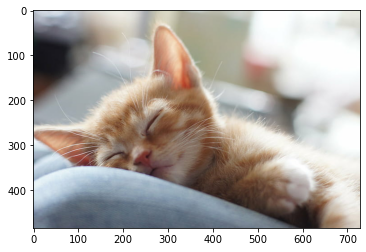

In [11]:
readable_prediction("C:\\Users\\dassa\\Desktop\\doggy door dataset\\selective-focus-of-green-dragon-fly-resting-on-green-leaf-grass-caballito-caballito-wallpaper-preview.jpg")

In [12]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 169ms/step
You're not a dog! Stay outside!


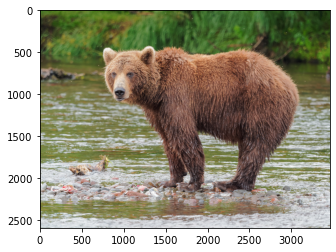

In [13]:
doggy_door("C:\\Users\\dassa\\Desktop\\doggy door dataset\\brown_bear.jpg")

(485, 728, 3)
Original image shape:  (485, 728, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 183ms/step
Kitty stay inside!


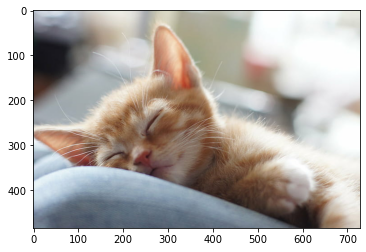

In [14]:
doggy_door("C:\\Users\\dassa\\Desktop\\doggy door dataset\\selective-focus-of-green-dragon-fly-resting-on-green-leaf-grass-caballito-caballito-wallpaper-preview.jpg")

(1080, 1920, 3)
Original image shape:  (1080, 1920, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 152ms/step
Doggy come on in!


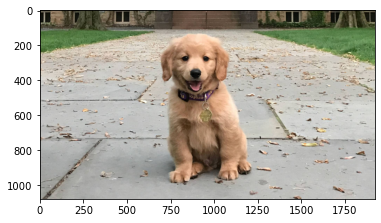

In [15]:
doggy_door("C:\\Users\\dassa\\Desktop\\doggy door dataset\\KOA_Nassau_2697x1517.jpg")